In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import pickle

from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter

# Gathering and Loading Data

In [80]:
df=pd.read_csv("spam.csv" ,encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [81]:
df.drop(columns={"Unnamed: 2","Unnamed: 3","Unnamed: 4"},inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [82]:
df.rename(columns={"v1":"message_type","v2":"message"},inplace=True)
df.sample(5)

,message_type,message
930,ham,I'm really sorry i won't b able 2 do this frid...
78,ham,Does not operate after &lt;#&gt; or what
3268,ham,Raviyog Peripherals bhayandar east
2375,ham,Thanx 4 2day! U r a goodmate I THINK UR RITE S...
5082,ham,Amazing : If you rearrange these letters it gi...


In [83]:
encoder = LabelEncoder()

df["message_type"] = encoder.fit_transform(df["message_type"])
df["message_type"].sample(5)

df[df["message_type"]==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


### Now let’s check for the missing values

In [84]:
df.isnull().sum()

message_type    0
message         0
dtype: int64

In [85]:
df.duplicated().sum()

403

There are 403 duplicated values and we have to remove them

In [86]:
df=df.drop_duplicates()

# Exploratory Data Analysis (Visualise)

In [87]:
df["message_type"].value_counts()

message_type
0    4516
1     653
Name: count, dtype: int64

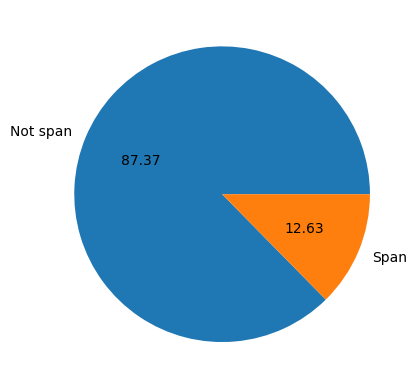

In [88]:
plt.pie(df["message_type"].value_counts(),labels=["Not span","Span"], autopct="%0.2f")
plt.show()

## For a number of Characters

 punkt is the required package for tokenization.

In [89]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
df["num_characters"] = df["message"].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# For a number of words 

In [91]:
df["message"].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [92]:
df["num_words"]=df["message"].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,message_type,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


# For a number of Sentences

In [93]:
df["message"].apply(lambda x : nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: message, Length: 5169, dtype: object

In [94]:
df["num_sentences"]=df["message"].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# For ‘Ham’ messages

In [95]:
df[df["message_type"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


# For 'Spam' messages

In [96]:
df[df["message_type"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


We can clearly see the spam messages are quite longer than the ham messages

# for characters

<Axes: xlabel='num_characters', ylabel='Count'>

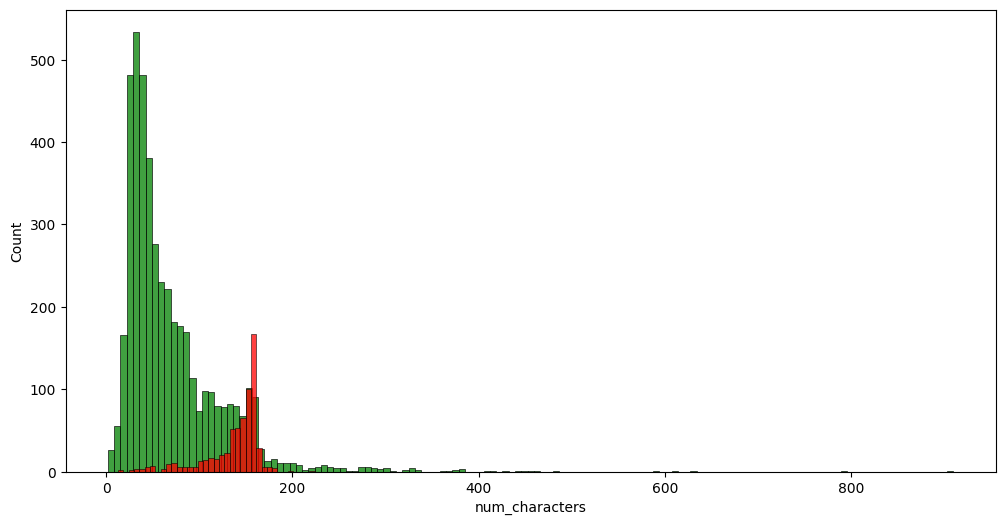

In [97]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["message_type"]==0]["num_characters"],color="green")
sns.histplot(df[df["message_type"]==1]["num_characters"],color="red")

# For Words

<Axes: xlabel='num_words', ylabel='Count'>

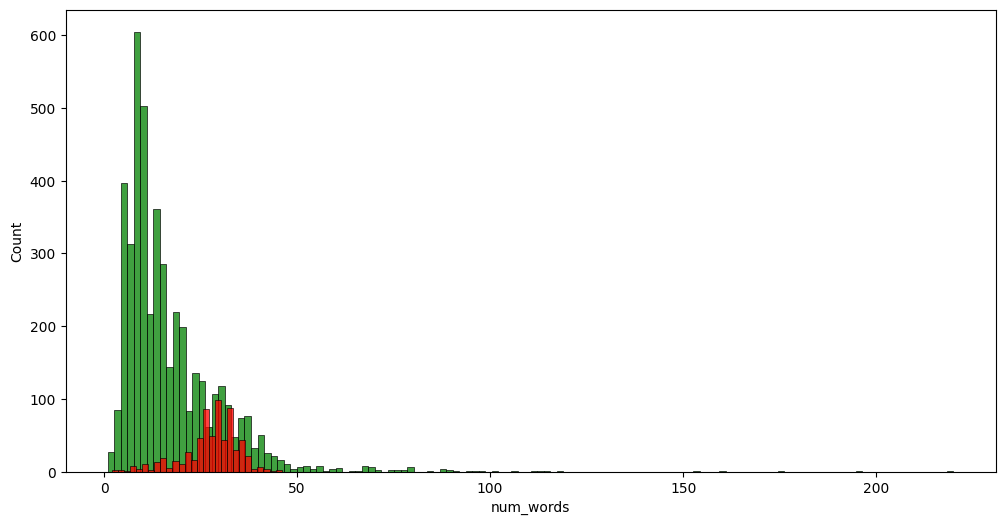

In [98]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["message_type"]==0]["num_words"],color="green")
sns.histplot(df[df["message_type"]==1]["num_words"],color="red")

# Data Preprocessing

In [99]:
ps=PorterStemmer()
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
len(stopwords.words('english')) 

179

In [101]:
df["transformed_msg"] = df["message"].apply(transform_text)
df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Wordcloud

In [102]:
wc= WordCloud(width=500,height=500,min_font_size=10,background_color="black")

### For spam

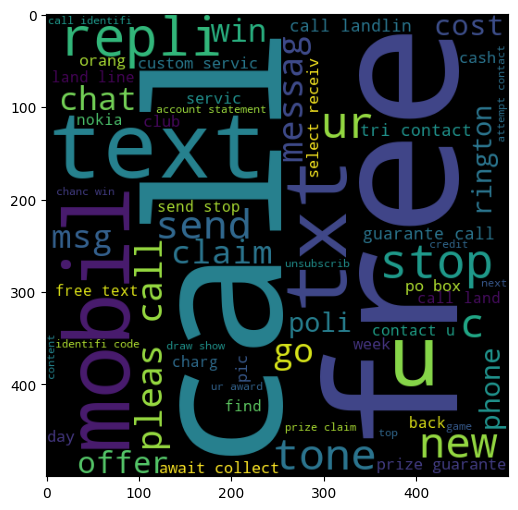

In [103]:
spam_wc =wc.generate(df[df["message_type"]==1]["transformed_msg"].str.cat(sep=""))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

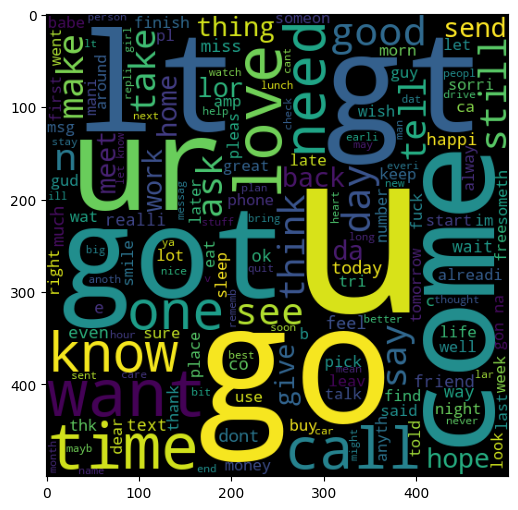

In [104]:
ham_wc =wc.generate(df[df["message_type"]==0]["transformed_msg"].str.cat(sep=""))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [105]:
wcwords=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        wcwords.append(word)


Counter(wcwords).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [106]:
df_word_counts = pd.DataFrame(Counter(wcwords).most_common(30), columns=['Word', 'Count'])

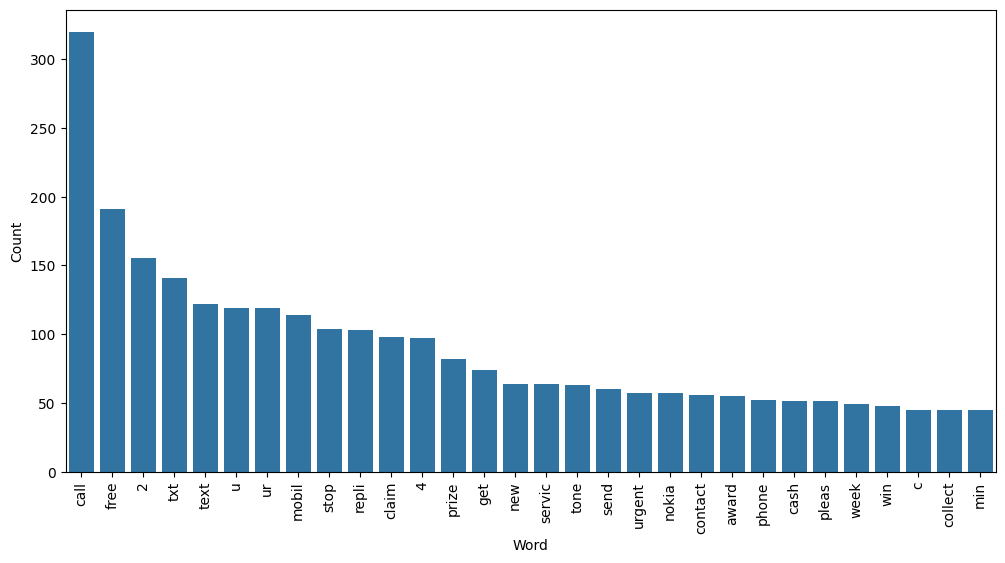

In [107]:
plt.figure(figsize=(12,6))
sns.barplot(x="Word",y="Count",data=df_word_counts)
plt.xticks(rotation="vertical")
plt.show()

# Building a Model using Naive Bayes

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [109]:
tfidf= TfidfVectorizer(analyzer='char',max_features=3000) 
X=tfidf.fit_transform(df['transformed_msg']).toarray()
Y=df["message_type"].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [110]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

# GaussianNB()

In [111]:
gnb.fit(X_train,Y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(Y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(Y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(Y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.28433268858800775
Confusion Matrix of Guassian NB is:  [[156 740]
 [  0 138]]
Precision score of the Gaussian NB is 0.1571753986332574


# BernoulliNB()

In [112]:
bnb.fit(X_train,Y_train)
y_pred2=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(Y_test,y_pred2))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(Y_test,y_pred2))
print('Precision score of the Bernoulli NB is',precision_score(Y_test,y_pred2))

Accuracy score of Bernoulli NB is:  0.9584139264990329
Confusion Matrix of Bernoulli NB is:  [[875  21]
 [ 22 116]]
Precision score of the Bernoulli NB is 0.8467153284671532


# MultinomialNB()

In [113]:
mnb.fit(X_train,Y_train)
y_pred3=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(Y_test,y_pred3))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(Y_test,y_pred3))
print('Precision score of the Multinomial NB is',precision_score(Y_test,y_pred3))

Accuracy score of Multinomial NB is:  0.9535783365570599
Confusion Matrix of Multinomial NB is:  [[888   8]
 [ 40  98]]
Precision score of the Multinomial NB is 0.9245283018867925


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

Lets compare other classification algorithms with MNB

In [115]:
#Creating objects of every algorithm
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [116]:
# create a dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [117]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [118]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9613152804642167, 0.9152542372881356)

In [119]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9613152804642167
Precision -  0.9152542372881356
For  KN
Accuracy -  0.9642166344294004
Precision -  0.9173553719008265
For  NB
Accuracy -  0.9535783365570599
Precision -  0.9245283018867925
For  DT
Accuracy -  0.960348162475822
Precision -  0.907563025210084
For  LR
Accuracy -  0.9642166344294004
Precision -  0.9105691056910569
For  RF
Accuracy -  0.9680851063829787
Precision -  0.926829268292683


c:\Users\Asus\Documents\Vishva Projects\email-spam-detector\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.8702290076335878
For  BgC
Accuracy -  0.9690522243713733
Precision -  0.9416666666666667
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9508196721311475
For  GBDT
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9411764705882353


In [120]:
performance_dfs = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [121]:
print(type(performance_dfs))

<class 'pandas.core.frame.DataFrame'>


In [122]:
performance_df1 = pd.melt(performance_dfs, id_vars= "Algorithm")

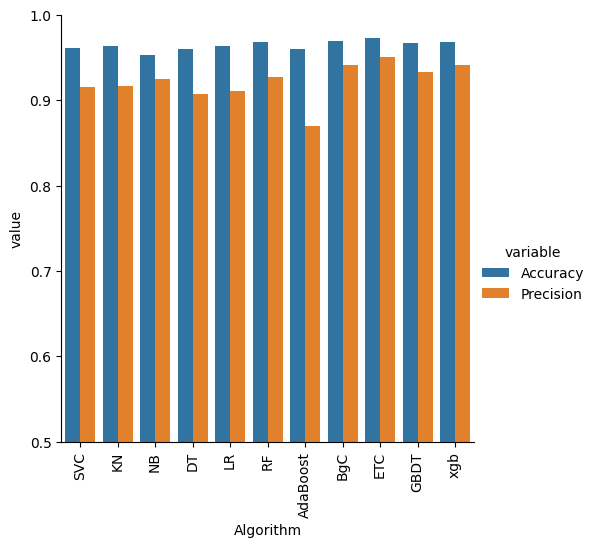

In [123]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [124]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [125]:
new_df = performance_dfs.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [126]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [127]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.961315,0.915254,0.961315,0.915254,0.961315,0.915254,0.961315,0.915254
1,KN,0.964217,0.917355,0.964217,0.917355,0.964217,0.917355,0.964217,0.917355
2,NB,0.953578,0.924528,0.953578,0.924528,0.953578,0.924528,0.953578,0.924528
3,DT,0.960348,0.907563,0.960348,0.907563,0.960348,0.907563,0.960348,0.907563
4,LR,0.964217,0.910569,0.964217,0.910569,0.964217,0.910569,0.964217,0.910569
5,RF,0.968085,0.926829,0.968085,0.926829,0.968085,0.926829,0.968085,0.926829
6,AdaBoost,0.960348,0.870229,0.960348,0.870229,0.960348,0.870229,0.960348,0.870229
7,BgC,0.969052,0.941667,0.969052,0.941667,0.969052,0.941667,0.969052,0.941667
8,ETC,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820
9,GBDT,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333


# Building a Website

In [128]:
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open("model.pkl", "wb"))